## Applications of Eigenvalues and Eigenvectors

### Discrete dynamical systems

It is often useful to describe a structure that has multiple components with a single vector.  If that structure is changing in time due to some process, it is typical to refer to the vector as a **state vector** since it describes the *state* of the structure at some particular time.  It is quite common to model such dynamic processes at discrete times and use linear transformations to model the evolution of the state vector from one time to the next.

Let's suppose that we aim to describe a sequence of vectors at times $t=0, 1, 2, 3,$... with state vectors $X_0$, $X_1$, $X_2$, $X_3$.... at those times.  We propose to calculate the state vector $X_t$ based only on the previous state vector $X_{t-1}$.  If we model the transition from $X_{t-1}$ to $X_t$ with a linear transformation, then there is a matrix such that $X_t = AX_{t-1}$.  This sort of model is known as a **discrete dynamical system** and is used in many areas from economics to biology.

#### Infectious Disease Model

In this example we consider a basic model of an infectious disease that is spreading within a population.  A well known family of models for this scenario is known as the $SIR$ models.  The acronym comes from a basic modeling assumption that the population is divided into three categories: Susceptible, Infectious, and Recovered.  As the disease spreads, a portion of the Susceptible individuals become Infectious, and a portion of Infectious individuals become Recovered.  We will consider a small variation in the model which assumes that a portion of Recovered individuals return to the Susceptible category.  This variation, known as an $SIRS$ model, would be a more accurate description of a disease which can be contracted multiple times.

We suppose that the population is completely homogeneous in all regards, so that all individuals in a given category have the same probabilities to move to the next category.

To model real-world epidemics, it is necessary to estimate some parameters that specify how quickly individuals move among the categories.  These parameters will be important in making any predictions with the model.  For our demonstration, we will create an example.  Let us suppose that our state vectors describe the population at time intervals of 1 week, and that every week, 5% of the Susceptible population becomes Infectious, and 20% of the Infectious population becomes Recovered.  We also suppose that 15% of the Recovered population again becomes Susceptible every week.

If we let $s_t$, $i_t$, and $r_t$ represent the percentage of the three categories of the population at time $t$, we can write equations based on the modeling assumptions that allows us to calculate the values based on $s_{t-1}$, $i_{t-1}$, and $r_{t-1}$

$$
\begin{eqnarray}
s_t & = & 0.95s_{t-1} \hspace{2cm} + 0.15r_{t-1} \\
i_t & = & 0.05s_{t-1}  + 0.80i_{t-1} \\
r_t & = & \hspace{2cm} 0.20i_{t-1} + 0.85r_{t-1} 
\end{eqnarray}
$$

Now we can define $X_t$ as the vector with components $s_t$, $i_t$, and $r_t$, so that the equations can be written using matrix multiplication.

$$
\begin{equation}
X_t = \left[ \begin{array}{r} s_t \\ i_t \\ r_t  \end{array}\right] =
\left[ \begin{array}{rrr} 0.95 & 0 & 0.15 \\ 0.05 & 0.80 & 0 \\ 0 & 0.20 & 0.85 \end{array}\right]
\left[ \begin{array}{r} s_{t-1} \\ i_{t-1} \\ r_{t-1}  \end{array}\right]=
AX_{t-1}
\end{equation}
$$

The linear transformation $L:\mathbb{R}^3 \to \mathbb{R}^3$ defined by this matrix multiplication maps the state of the 
population at time $t-1$, to the state of the population at time $t$.  For an example let's label the initial state vector $X_0$, and consider what happens if initially 5% of the population is infective, and the other 95% of the population is susceptible. 

$$
\begin{equation}
X_0 = \left[ \begin{array}{r} 0.95 \\ 0.05 \\ 0  \end{array}\right] 
\end{equation}
$$

We compute $X_1 = AX_0$.

In [1]:
import numpy as np
A = np.array([[0.95, 0, 0.15],[0.05,0.8,0],[0,0.2,0.85]])

## X at time 0
X_0 = np.array([[0.95],[0.05],[0]])

## Compute X at the next time
X_1 = A@X_0

print(X_1)

[[0.9025]
 [0.0875]
 [0.01  ]]


Applying the transformation again gives $X_2 = AX_1 = A^2X_0$, the state of the population at time $t=2$.  In general, $n$ repeated applications of the transformation yield $X_n = A^nX_0$, the state of the population $n$ weeks into the future.  Let's compute $X_{50}$ as an example.

In [2]:
import matplotlib.pyplot as plt
## X at time 0
X = np.array([[0.95],[0.05],[0]])

for t in range(50):
    X = A@X
    
print(X)

[[0.63157999]
 [0.15789071]
 [0.2105293 ]]


In such models attention is typically focused on the ultimate behavior of the state vector.  We want to know if the composition of the population reaches an equilibrium, or continues to change.  If it reaches an equilibrium, can we calculate it directly, instead of applying the matrix multiplication a large number of times?  We will address these questions in Chapter 5, when we learn more about computing $A^n$ efficiently. 

We will plot the first 50 iterations of $s_t,i_t,$ and $r_t$ using the same initial conditions as the example.

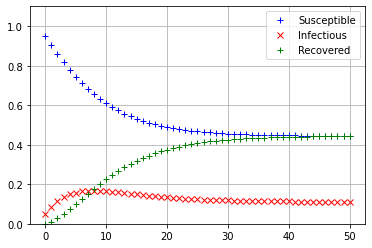

In [3]:
A = np.array([[0.95, 0, 0.05],[0.05,0.8,0],[0,0.2,0.95]])

## T is final time
T = 50
## X at time 0
X = np.array([[0.95],[0.05],[0]])

## The first column of results contains the initial values 
results = np.copy(X)

for i in range(T):
    X = A@X
    results = np.hstack((results,X))

## t contains the time indices 0, 1, 2, ..., T
t = np.linspace(0,T,T+1)
## s, i, r values are the rows of the results array
s = results[0,:]
i = results[1,:]
r = results[2,:]

fig,ax = plt.subplots()

## The optional label keyword argument provides text that is used to create a legend
ax.plot(t,s,'b+',label="Susceptible");
ax.plot(t,i,'rx',label="Infectious");
ax.plot(t,r,'g+',label="Recovered");

ax.set_ylim(0,1.1)
ax.grid(True)
ax.legend();

It  appears that the population has reached an equilibrium after about 45 weeks, but one that was different than in the example. The proportion of the population that is susceptible seems to be equal to the porportion of the population that is recovered at roughly 45%, and the proportion that is infectious seems to be about 10%. To find the true equilibrium values, we calculate the $\texttt{RREF}$ of the augmented matrix $[(A-I)|0]$.

In [4]:
import sympy
I = np.eye(3)
ZERO = np.zeros((3,1))
augmented_matrix = np.hstack((A-I,ZERO))
reduced_matrix=sympy.Matrix(augmented_matrix).rref()
print(reduced_matrix)

(Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0]]), (0, 1, 2))


In the reduced system for the equilibrium values $s$, $i$, and $r$, we can take $r$ as the free variable and write $s=r$ and $i=0.25r$.  For any value of $r$, a vector of the following form is an eigenvector for $A-I$, corresponding to the eigenvalue one.

$$
\begin{equation}
r\left[ \begin{array}{r} 1 \\ 0.25 \\ 1  \end{array}\right]
\end{equation}
$$

If we add the constraint that $s + i + r = 1$, then we get the equation $r + 0.25r + r = 1$ which gives the unique equilibrium values of $r = 4/9$, $s=4/9$, and $i=1/9$.  If we carry out a large number of iterations, we see that the computed values are very close to the theoretical equilibrium values. 

In [5]:
## T is final time
T = 100
## X at time 0
X = np.array([[0.95],[0.05],[0]])

for i in range(T):
    X = A@X

print("Computed values of s, i, r at time ",T,":")
print(X)

Computed values of s, i, r at time  100 :
[[0.44444478]
 [0.1111114 ]
 [0.44444382]]


With the basic concepts related to eigenvalues and eigenvectors in place, we examine discrete dynamical systems  in relation to eigenvalues and eigenvectors.

### Infectious disease model

For the $SIRS$ model of infectious disease, we had the following discrete dynamical system.


$$
\begin{equation}
X_t = \left[ \begin{array}{r} s_t \\ i_t \\ r_t  \end{array}\right] =
\left[ \begin{array}{rrr} 0.95 & 0 & 0.15 \\ 0.05 & 0.80 & 0 \\ 0 & 0.20 & 0.85 \end{array}\right]
\left[ \begin{array}{r} s_{t-1} \\ i_{t-1} \\ r_{t-1}  \end{array}\right]=
AX_{t-1}
\end{equation}
$$

Given an initial condition $X_0$, we know that $X_n = A^nX_0$.  We are interested in determining the behavior of the system for large $n$.  We might now recognize that this calculation is exactly the same as the Power Method and therefore expect that the sequence of vectors produced should tend toward the eigenvector corresponding to the largest eigenvalue.

In this case the components of the vector have individual meaning, so let's calculate the first $20$ iterations and plot $s_t$, $i_t$, and $r_t$ to get a sense of how they are changing.  For this calculation we store each vector $X_t$ as a column in an array named $\texttt{results}$. 

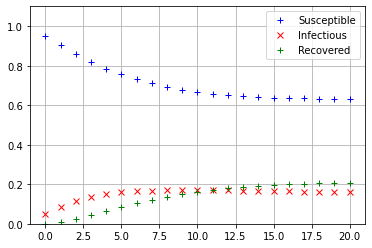

In [6]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
            #   S    I   R
A = np.array([[0.95, 0, 0.15],
              [0.05,0.8,0],
              [0,0.2,0.85]]) #s.i.r.s transition matrix recovered -> susceptible happening again

# T is final time
T = 20
# X at time 0
X = np.array([[0.95],[0.05],[0]])

# The first column of results contains the initial values 
results = np.copy(X)

for i in range(T):
    X = A@X
    results = np .hstack((results,X))

# t contains the time indices 0, 1, 2, ..., T
t = np.linspace(0,T,T+1)
# s, i, r values are the rows of the results array
s = results[0,:]
i = results[1,:]
r = results[2,:]

fig,ax = plt.subplots()

# The optional label keyword argument provides text that is used to create a legend
ax.plot(t,s,'b+',label="Susceptible");
ax.plot(t,i,'rx',label="Infectious");
ax.plot(t,r,'g+',label="Recovered");

ax.set_ylim(0,1.1)
ax.grid(True)
ax.legend();

Based on the calculation it appears that the state of the population has reached an *equilibrium* after 20 weeks.  In the equilibrium state, each category of the population, $S$, $I$, and $R$, have as many individuals entering the category as leaving it.  In terms of the matrix equation, if $X$ is the vector that contains the equilibrium values of $s_t$, $i_t$, and $r_t$, then $X$ must be a solution to the equation $AX=X$, since $X_{t-1}=X_t$ when the components are not changing.  The equation $AX=X$ implies that $X$ is an eigenvector of $A$ corresponding to an eigenvalue of one.  

The equation $AX=X$ represents a linear system, even though it is not written in the typical form.  We can rearrange it to look more familiar by using the tools of matrix algebra.  The key is to recognize that $X$ can be written as $IX$, where $I$ is the identity matrix.  This gives $AX=IX$, which can be rewritten as $(A-I)X = 0$.  This matrix equation is the type with which we have been working throughout the previous chapters.

Before attempting to solve the system $(A-I)X = 0$, we first recognize it as a [Homogeneous System](Linear_Independence.ipynb) and apply some reasoning based on our knowledge of linear systems.  We know that the solution set of a homogeneous system certainly contains the trivial solution $X=0$.  Therefore if there is also a nonzero solution to $(A-I)X=0$, the system must have an infinite number of solutions since linear systems always have zero, exactly one, or an infinite number of solutions.  If the system $(A-I)X=0$ does not have a unique solution there must be a free variable, which means that one of the columns of the matrix $A-I$ will not have a pivot. In this case the direct methods of solution based on $LU$ or $QR$ factorizations will fail.  We must go back to the basic row operations and calculate the RREF of the augmented matrix $[(A-I)|0]$.     

In [7]:
import sympy
I = np.eye(3)
ZERO = np.zeros((3,1))
augmented_matrix = np.hstack((A-I,ZERO))
aug=sympy.Matrix(augmented_matrix).rref()
print("Reduced matrix,", aug)

Reduced matrix, (Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0]]), (0, 1, 2))


Starting with: A = [[0.95, 0, 0.15],[0.05, 0.8, 0], [0, 0.2, 0.85]]:

* $s = 0.95s + 0.15r$.
* $i = 0.05s + 0.8i$.
* $r = 0.2i + 0.85r$.             We rearrange to get:

*   $-0.05s + 0r + 0.15r = 0$.!
*   $0.05s - 0.2i + 0r = 0$.!
*   $0s + 0.2i - 0.15r = 0$.!       From equation 2:

* $0.05s - 0.2i = 0$, then                 $0.05s = 0.2i$, then                $s = 4i$

* from equation 3 $0.2i - 0.15r = 0$, then $0.2i = 0.15r$, then $i = 0.75r$

now substituting into $s= 4i$, $s = 4(0.75r) = 3r$ 
* we have $s = 3r$, $i = 0.75r$ r=r (as our free variable)


In the reduced system for the equilibrium values $s$, $i$, and $r$, we can take $r$ as the free variable and write $s=3r$ and $i=0.75r$.  For any value of $r$, a vector of the following form is an eigenvector for $A-I$, corresponding to the eigenvalue one.

$$
\begin{equation}
r\left[ \begin{array}{r} 3 \\ 0.75 \\ 1  \end{array}\right]
\end{equation}
$$

Although this eigenvector is not unique, there is one more constraint on our equilibrium values that we have not yet addressed.  The variables $s$, $i$, and $r$ represent percentages of the population in each category, therefore we must also require that $s+i+r = 1$ in order for the results to be meaningful in the application.  This gives the equation $3r + 0.75r + r = 1$, which gives the unique equilibrium values of $r = 4/19$, $s=12/19$, and $i=3/19$.  If we carry out a large number of iterations, we see that the computed values are very close to the theoretical equilibrium values. 

In [8]:
## T is final time
T = 100
## X at time 0
X = np.array([[0.95],[0.05],[0]])

for i in range(T):
    X = A@X

print("Expected values of s, i, r:")
print("r =",12/19,"i =", 3/19,"i =", 4/19,'\n')
print("Computed values of s, i, r at time ",T,":")
print(X)

Expected values of s, i, r:
r = 0.631578947368421 i = 0.15789473684210525 i = 0.21052631578947367 

Computed values of s, i, r at time  100 :
[[0.63157895]
 [0.15789474]
 [0.21052632]]


The results agree nicely with our analysis, but there are two remaining questions:

1. Why is it that $s_t+i_t+r_t = 1$ for every $t$ in the calculation, even though this constraint does not appear to be enforced?
2. What are the results if we change the initial population composition given by $X_0$?

The answer to the first question is simple, but not immediately obvious.  If we add the three equations that define $s_t$, $i_t$, and $r_t$, we find that $s_t+i_t+r_t = s_{t-1} + i_{t-1} + r_{t-1}$.  This means that as long as the three equations are true, the sum $s_t+i_t+r_t$ does not change as we carry the iteration forward in time.  Since we start with the components of $X_0$ summing to one, the components of $X_t$ will sum to one for all other $t$.

In order to answer the second question, we assume that we start with an arbitrary $X_0$, although we will require that the components of $X_0$ to be nonnegative and add to one so that the results are meaningful in the application.  As we did when considering the Power Method, we write $X_0$ as a linear combination of $\{V_1, V_2, V_3\}$, the eigenvectors of $A$.  This makes  it easy to express $X_t = A^tX_0$ in terms of the eigenvectors as well, just as did before.

$$
\begin{eqnarray*}
X_0 & = & c_1V_1 + c_2V_2 + c_3V_3 \\
X_t & = & c_1\lambda_1^tV_1 + c_2\lambda_2^tV_2 + c_3\lambda_3^tV_3 
\end{eqnarray*}
$$

Based on the results of our calculations, we expect that $\lambda_1 = 1$ is the largest eigenvalue.

$$
\begin{equation}
X_t  =  c_1V_1 + c_2\lambda_2^tV_2 + c_3\lambda_3^tV_3 
\end{equation}
$$

If $|\lambda_2|< 1$ and $|\lambda_3|< 1$ then the second and the third terms will approach zero as $t$ gets large and $X_t$ will approach the direction of $V_1$.  We use SciPy to verify that $\lambda_2$ and $\lambda_3$ are in fact a pair of complex numbers with magnitude less than one.

In [9]:
import scipy.linalg as sla
EVAL, EVEC = sla.eig(A)

print(EVAL,'\n')
## The absolute function finds the absolute value of real numbers, or magnitude of complex numbers.
print(np.absolute(EVAL[1]))
print(np.absolute(EVAL[2]))

[1. +0.j         0.8+0.08660254j 0.8-0.08660254j] 

0.8046738469715539
0.8046738469715539


Therefore unless $c_1 = 0$, the vectors $X_t$ approach the direction of $V_1$.  The case where $c_1 = 0$ corresponds to initial conditions with negative entries, which are not relevant in the application.  The conclusion is that $X_t$ will approach the equilibrium state for all meaningful initial configurations of the population. 

### Exercises

**Exercise 1:** Experiment with a range of initial conditions in the infectious disease model to provide evidence that an equilibrium state is reached for all meaningful initial states. 

### Describe the solution for 1 here

Applying the same concept as the example, using the same transitional matrix, but changing/using multiple initial conditions to visualize its effect, if they reach equilibrium or not and at what range. 

Now we test the notion here using the regular SIR model for range 50 

$$
\begin{equation}
X_t = \left[ \begin{array}{r} s_t \\ i_t \\ r_t  \end{array}\right] =
\left[ \begin{array}{rrr} 0.95 & 0 & 0.05 \\ 0.05 & 0.80 & 0 \\ 0 & 0.20 & 0.95 \end{array}\right]
\left[ \begin{array}{r} s_{t-1} \\ i_{t-1} \\ r_{t-1}  \end{array}\right]=
AX_{t-1}
\end{equation}
$$

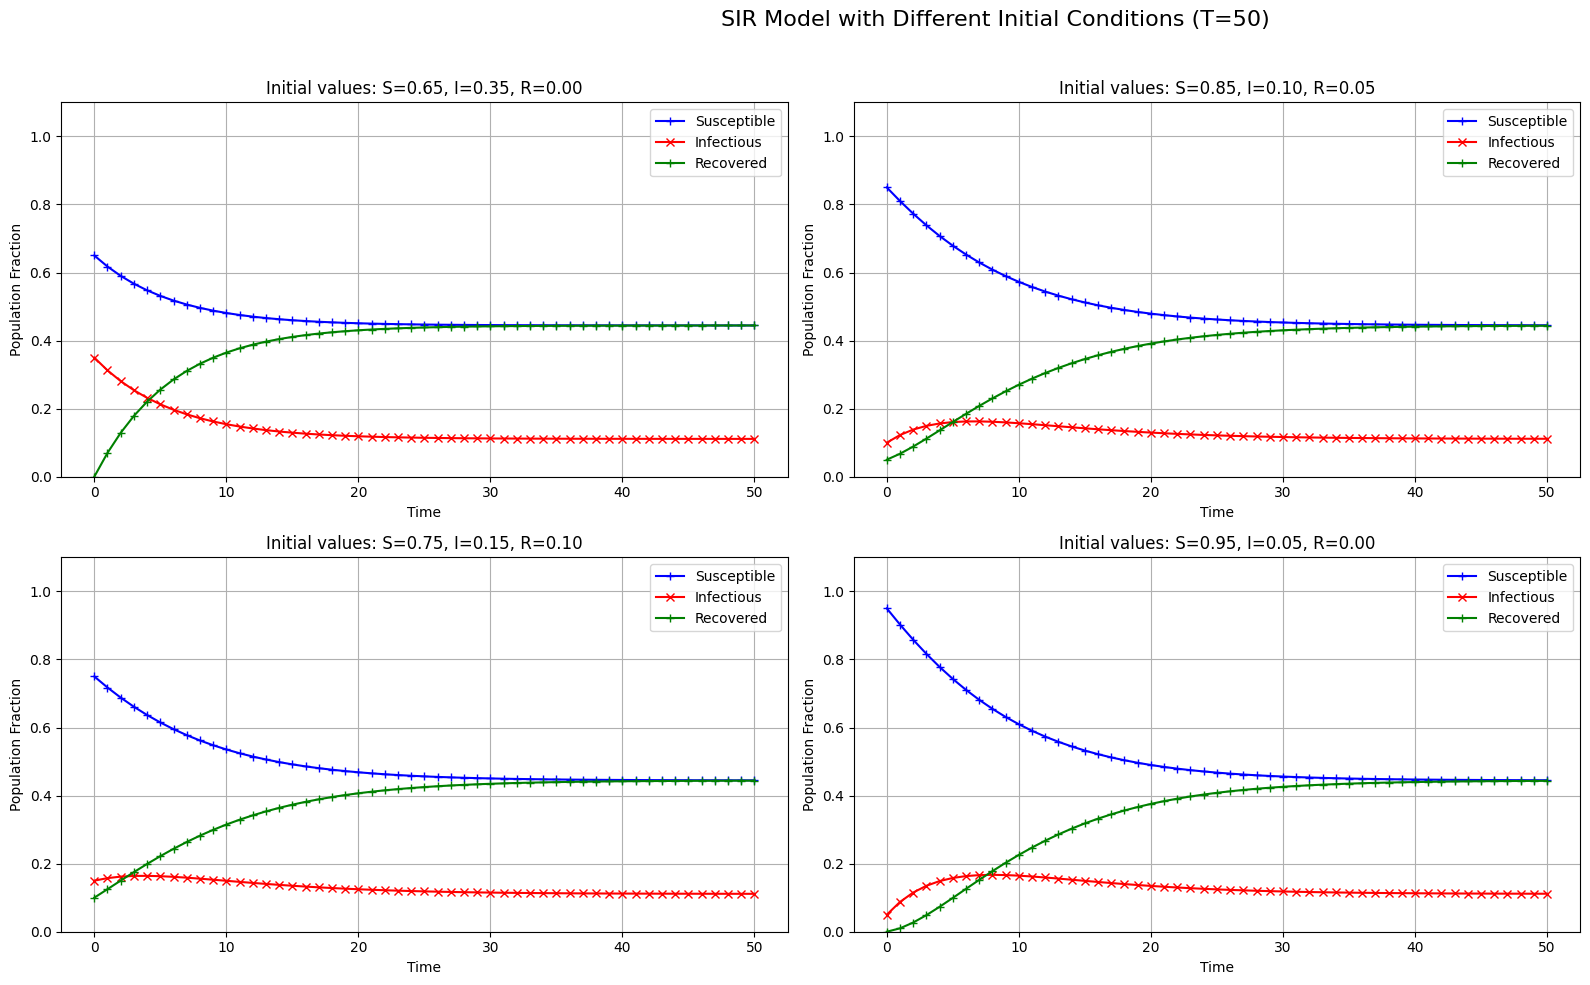

In [55]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

A = np.array([[0.95, 0, 0.05],[0.05,0.8,0],[0,0.2,0.95]])

## T is final time
T = 50

# Create a single figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
axes = axes.flatten()  # Flatten the 2x2 grid to make indexing easier

# X at time 0 for different initial values
X_conditions = [
    np.array([[0.65], [0.35], [0.0]]),
    np.array([[0.85], [0.10], [0.05]]),
    np.array([[0.75], [0.15], [0.10]]),
    np.array([[0.95], [0.05], [0.0]])
]

# Loop over each initial condition and simulate the model
for idx, X0 in enumerate(X_conditions):
    X = np.copy(X0)  # Reset X to the initial condition for each loop
    results = np.copy(X)

    for i in range(T):
        X = A@X
        results = np.hstack((results,X))

    # t contains the time indices 0, 1, 2, ..., T
    t = np.linspace(0,T,T+1)
    # s, i, r values are the rows of the results array
    s = results[0,:]
    i = results[1,:]
    r = results[2,:]
    
    # Get the current subplot
    ax = axes[idx]
    
    # Plot on the current subplot
    ax.plot(t, s, 'b+-', label="Susceptible")
    ax.plot(t, i, 'rx-', label="Infectious")
    ax.plot(t, r, 'g+-', label="Recovered")
    ax.set_title(f'Initial values: S={X0[0,0]:.2f}, I={X0[1,0]:.2f}, R={X0[2,0]:.2f}')
    ax.set_ylim(0, 1.1)
    ax.grid(True)
    ax.legend()
    ax.set_xlabel('Time')
    ax.set_ylabel('Population Fraction')

# Add a main title to the figure
fig.suptitle('SIR Model with Different Initial Conditions (T=50)', fontsize=16)
plt.tight_layout(rect=[0, 0, 0.8, 0.96])  # Adjust layout to make room for the suptitle
plt.show()

In [56]:
# Calculate and print the final values for each initial condition
print("Final values after T=50 time steps:")
for idx, X0 in enumerate(X_conditions):
    X = np.copy(X0)
    for i in range(T):
        X = A@X
    print(f"Initial: S={X0[0,0]:.2f}, I={X0[1,0]:.2f}, R={X0[2,0]:.2f} → Final: S={X[0,0]:.4f}, I={X[1,0]:.4f}, R={X[2,0]:.4f}")

# Calculate the equilibrium distribution (eigenvector of A with eigenvalue 1)
eigenvalues, eigenvectors = np.linalg.eig(A)
idx = np.argmin(np.abs(eigenvalues - 1.0))
equilibrium = eigenvectors[:, idx] / sum(eigenvectors[:, idx])
print("\nTheoretical equilibrium distribution:")
print(f"S={np.real(equilibrium[0]):.4f}, I={np.real(equilibrium[1]):.4f}, R={np.real(equilibrium[2]):.4f}")

Final values after T=50 time steps:
Initial: S=0.65, I=0.35, R=0.00 → Final: S=0.4445, I=0.1112, R=0.4444
Initial: S=0.85, I=0.10, R=0.05 → Final: S=0.4449, I=0.1115, R=0.4436
Initial: S=0.75, I=0.15, R=0.10 → Final: S=0.4448, I=0.1114, R=0.4439
Initial: S=0.95, I=0.05, R=0.00 → Final: S=0.4451, I=0.1116, R=0.4433

Theoretical equilibrium distribution:
S=0.4444, I=0.1111, R=0.4444


Reviewing the following plots, and their respective initial conditions, we can see that they all eventually reach equilibrium for every meaningful initial conditions, and they all do this at similar equlibrium distritbution probabilities


Now we test the notion here using the SIRS model, considering a small variation in the model which assumes that a portion of Recovered individuals return to the Susceptible category, for range 20 (weeks)

$$
\begin{equation}
X_t = \left[ \begin{array}{r} s_t \\ i_t \\ r_t  \end{array}\right] =
\left[ \begin{array}{rrr} 0.95 & 0 & 0.15 \\ 0.05 & 0.80 & 0 \\ 0 & 0.20 & 0.85 \end{array}\right]
\left[ \begin{array}{r} s_{t-1} \\ i_{t-1} \\ r_{t-1}  \end{array}\right]=
AX_{t-1}
\end{equation}
$$

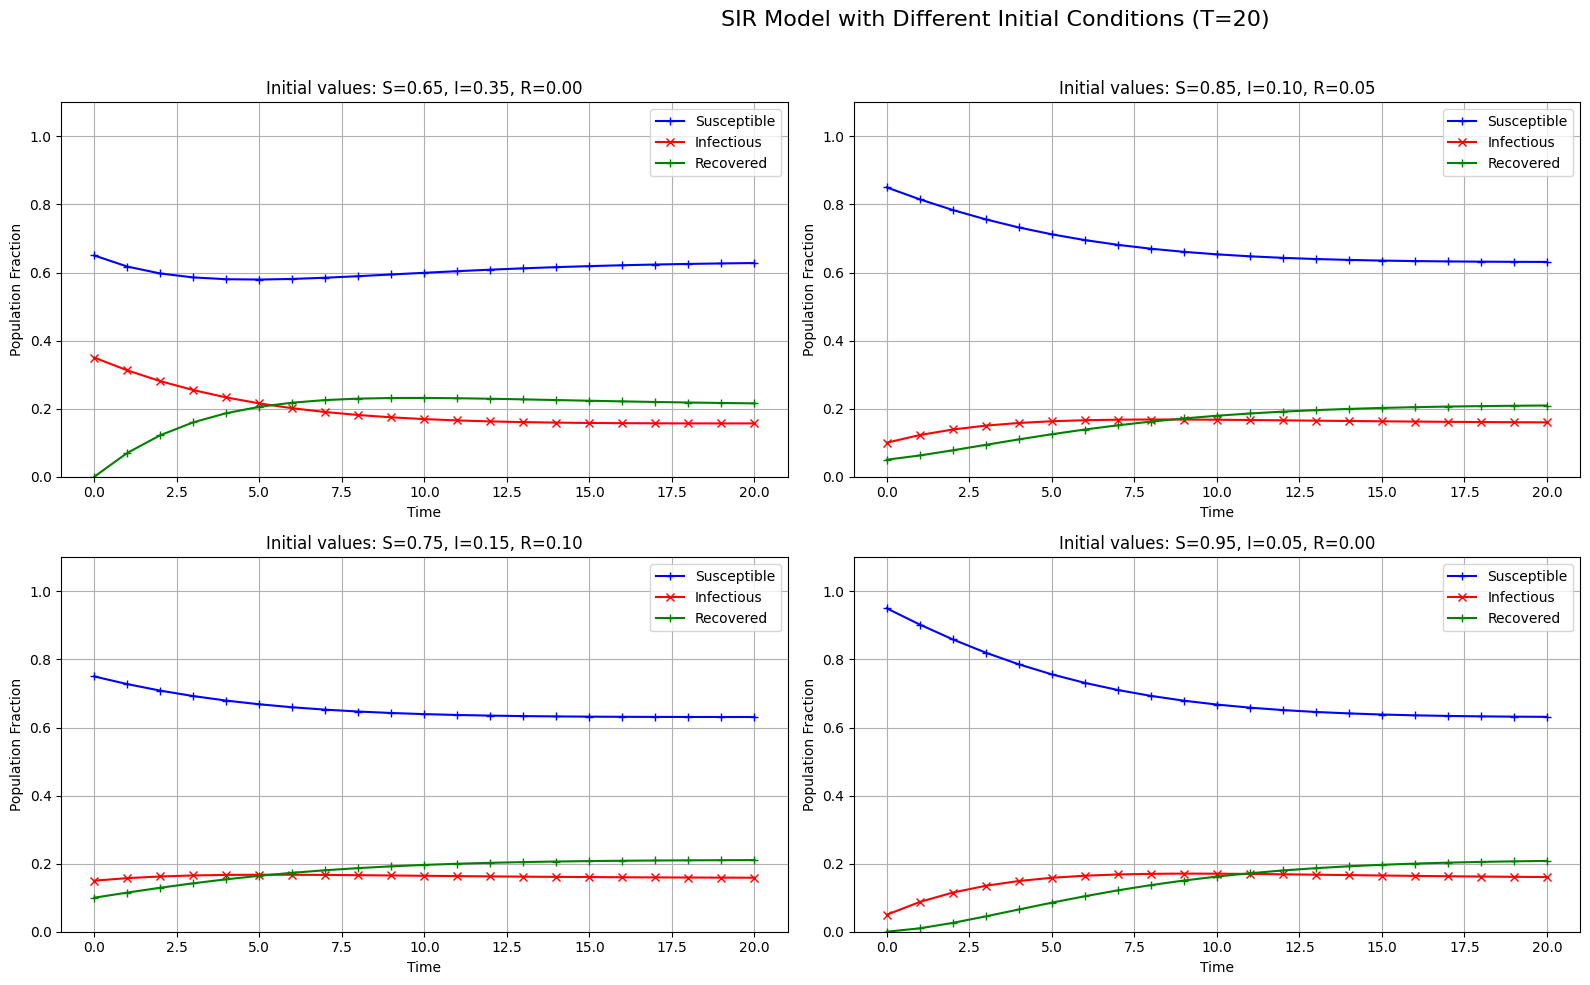

In [49]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

A = np.array([[0.95, 0, 0.15],[0.05,0.8,0],[0,0.2,0.85]])

## T is final time
T = 20

# Create a single figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
axes = axes.flatten()  # Flatten the 2x2 grid to make indexing easier

# X at time 0 for different initial values
X_conditions = [
    np.array([[0.65], [0.35], [0.0]]),
    np.array([[0.85], [0.10], [0.05]]),
    np.array([[0.75], [0.15], [0.10]]),
    np.array([[0.95], [0.05], [0.0]])
]

# Loop over each initial condition and simulate the model
for idx, X0 in enumerate(X_conditions):
    X = np.copy(X0)  # Reset X to the initial condition for each loop
    results = np.copy(X)

    for i in range(T):
        X = A@X
        results = np.hstack((results,X))

    # t contains the time indices 0, 1, 2, ..., T
    t = np.linspace(0,T,T+1)
    # s, i, r values are the rows of the results array
    s = results[0,:]
    i = results[1,:]
    r = results[2,:]
    
    # Get the current subplot
    ax = axes[idx]
    
    # Plot on the current subplot
    ax.plot(t, s, 'b+-', label="Susceptible")
    ax.plot(t, i, 'rx-', label="Infectious")
    ax.plot(t, r, 'g+-', label="Recovered")
    ax.set_title(f'Initial values: S={X0[0,0]:.2f}, I={X0[1,0]:.2f}, R={X0[2,0]:.2f}')
    ax.set_ylim(0, 1.1)
    ax.grid(True)
    ax.legend()
    ax.set_xlabel('Time')
    ax.set_ylabel('Population Fraction')

# Add a main title to the figure
fig.suptitle('SIR Model with Different Initial Conditions (T=20)', fontsize=16)
plt.tight_layout(rect=[0, 0, 0.8, 0.96])  # Adjust layout to make room for the suptitle
plt.show()

In [30]:
# Calculate and print the final values for each initial condition
print("Final values after T=20 time steps:")
for idx, X0 in enumerate(X_conditions):
    X = np.copy(X0)
    for i in range(T):
        X = A@X
    print(f"Initial: S={X0[0,0]:.2f}, I={X0[1,0]:.2f}, R={X0[2,0]:.2f} → Final: S={X[0,0]:.4f}, I={X[1,0]:.4f}, R={X[2,0]:.4f}")

# Calculate the equilibrium distribution (eigenvector of A with eigenvalue 1)
eigenvalues, eigenvectors = np.linalg.eig(A)
idx = np.argmin(np.abs(eigenvalues - 1.0))
equilibrium = eigenvectors[:, idx] / sum(eigenvectors[:, idx])
print("\nTheoretical equilibrium distribution:")
print(f"S={np.real(equilibrium[0]):.4f}, I={np.real(equilibrium[1]):.4f}, R={np.real(equilibrium[2]):.4f}")

Final values after T=20 time steps:
Initial: S=0.65, I=0.35, R=0.00 → Final: S=0.6279, I=0.1566, R=0.2155
Initial: S=0.85, I=0.10, R=0.05 → Final: S=0.6311, I=0.1597, R=0.2092
Initial: S=0.75, I=0.15, R=0.10 → Final: S=0.6309, I=0.1587, R=0.2104
Initial: S=0.95, I=0.05, R=0.00 → Final: S=0.6313, I=0.1607, R=0.2080

Theoretical equilibrium distribution:
S=0.6316, I=0.1579, R=0.2105


### Describe results of your graphs for 1 here.

Four different initial conditons where used for two different SIR model, while applying ranges 50 and 20 respectively. The their respective ranges produced different distribution probabilities, but they both have similar outcomes in that their eventually compositioned towards equilibrium, some initial conditions quicker than the other. 

* in both graphs with different state vectors, we see that the proportions of people in the model stabilized, with little to no change at all in the composition of people moving accross compartments. inflow equaling the outflow.

**Exercise 2:** Perform an analysis similar to that in the example for the following infectious disease model.  In this model the rate at which individuals move from the Recovered category to the Susceptible category is less than that in the example.  Make a plot similar to that in the example and also calculate the theoretical equilibrium values for $s$, $i$, and $r$.

$$
\begin{equation}
X_t = \left[ \begin{array}{r} s_t \\ i_t \\ r_t  \end{array}\right] =
\left[ \begin{array}{rrr} 0.95 & 0 & 0.05 \\ 0.05 & 0.80 & 0 \\ 0 & 0.20 & 0.95 \end{array}\right]
\left[ \begin{array}{r} s_{t-1} \\ i_{t-1} \\ r_{t-1}  \end{array}\right]=
AX_{t-1}
\end{equation}
$$

### Describe what you plan to do for 2 here:

For exercise 2, a new model rate for SIR is provided. The concept for achieving equilibrium here is the same, albeit with a little shift in the transitional matrix, but using the same initial condition as the example. A range of 50 would be used to check if the results from the examples transitional matrix and the exercise transitional matrix would produce comparable effect on the composition of the population before reaching equilibrium and how quick it achieved that state.

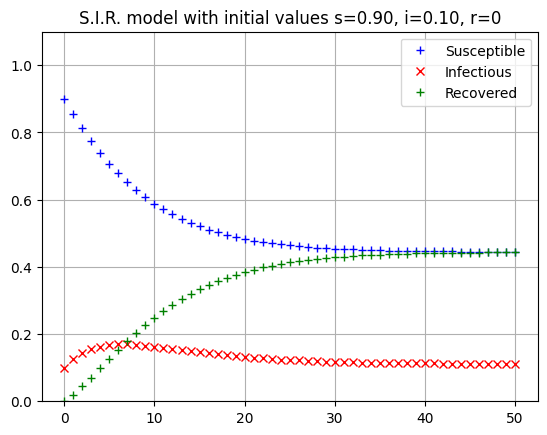

In [10]:
## Code solution for 2 with graphs here.
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

A = np.array([[0.95, 0, 0.05],[0.05,0.8,0],[0,0.2,0.95]])

## T is final time
T = 50
## X at time 0
X = np.array([[0.90],[0.10],[0]])

## The first column of results contains the initial values 
results = np.copy(X)

for i in range(T):
    X = A@X
    results = np .hstack((results,X))

## t contains the time indices 0, 1, 2, ..., T
t = np.linspace(0,T,T+1)
## s, i, r values are the rows of the results array
s = results[0,:]
i = results[1,:]
r = results[2,:]

fig,ax = plt.subplots()

## The optional label keyword argument provides text that is used to create a legend
ax.plot(t,s,'b+',label="Susceptible");
ax.plot(t,i,'rx',label="Infectious");
ax.plot(t,r,'g+',label="Recovered");
ax.set_title('S.I.R. model with initial values s=0.90, i=0.10, r=0');

ax.set_ylim(0,1.1)
ax.grid(True)
ax.legend();

### Describe what you see in the graphs here.

The transitional matrix does not seem to have much difference from the earlier examples provided. I tweaked the initial condition a little bit to see when equilibrium starts, but both the example graph and this plot seem to have similar starting point for S and R at around week 30 while I at week 10-15, suggesting that their state distribution stopped changing around those weeks.


In [24]:
## Find the row reduction of the augmented matrix here
import sympy
I = np.eye(3)
ZERO = np.zeros((3,1))
augmented_matrix = np.hstack((A-I,ZERO))
reduced_matrix=sympy.Matrix(augmented_matrix).rref()
print(reduced_matrix)

(Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0]]), (0, 1, 2))


### Describe the equilibrium values here and how you get them.


solve for X = A * X
in the reduced system for equilibrium for S.I.R, we can take 𝑟 as the free variable and write  𝑠=r=1 and  𝑖=0.25𝑟. from the transition matrix we get
$$ s = 0.95s + 0.15r, i = 0.05 + 0.8i, r = 0.2i + 0.85 $$
 solve for i from equation 2 in term of s. so
* $ i = 0.05s + 0.8i$
* $ 0.2i = 0.05s , therefore                0.05/0.2 $
* $i = 0.25s $

 Which gives the unique equilibrium values of $r = 4/9$, $s=4/9$, and $i=1/9$. Similar to the example.

In [25]:
# T is final time
T = 50
# X at time 0
X = np.array([[0.95],[0.05],[0]])

for i in range(T):
    X = A@X

print("Computed values of s, i, r at time ",T,":")
print(X)

Computed values of s, i, r at time  50 :
[[0.44508691]
 [0.11158598]
 [0.44332711]]


**Exercise 3:** Navigating webpages

In the dynamical system $X_t = AX_{t-1}$, the entries in the state vector $X_t$ can represent probabilities that a web browser is on a particular page after $t$ steps of random browsing defined by the matrix $A$, which is built using the link structure among the web pages.  The matrix and initial condition previously considered are given below.

$$
\begin{equation}
A = \left[ \begin{array}{ccccc} 
0 & 0.05 & 0.05 & 0.45 & 0.25 \\ 
0.45 & 0 & 0.85 & 0.45 & 0.25  \\
0.05 & 0.05 & 0 & 0.05 & 0.25  \\
0.05 & 0.05 & 0.05 & 0 & 0.25  \\
0.45 & 0.85 & 0.05 & 0.05 & 0  \\
\end{array}\right]
\hspace{2cm}
X_0 = \left[ \begin{array}{ccccc} 0 \\ 0 \\ 0 \\ 1 \\ 0
\end{array}\right]
\end{equation}
$$


Just as with the infectious disease model, determine an equilibrium probability distribution by finding the vector $X$ that solves $AX = X$.  

In [58]:
import sympy
A = np.array([[0,0.05,0.05,0.45,0.25],
              [0.45,0,0.85,0.45,0.25],
              [0.05,0.05,0,0.05,0.25],
              [0.05,0.05,0.05,0,0.25],
              [0.45,0.85,0.05,0.05,0]])


#include code here
T = 100
# X at time 0/initial condition
X = np.array([[0],[0],[0],[1],[0]])

# Calculate the equilibrium distribution (eigenvector of A with eigenvalue 1)
from sympy import *
eigenvalues, eigenvectors = np.linalg.eig(A)
idx = np.argmin(np.abs(eigenvalues - 1.0))
equilibrium = eigenvectors[:, idx] / sum(eigenvectors[:, idx])
print("\nTheoretical equilibrium distribution:")
#print(f"S={np.real(equilibrium[0]):.4f}, I={np.real(equilibrium[1]):.4f}, R={np.real(equilibrium[2]):.4f}")
Matrix(np.round(equilibrium,4))
    


Theoretical equilibrium distribution:


Matrix([
[0.1528],
[0.2952],
[0.1106],
[0.1106],
[0.3308]])

The above theoretical distributions are the eigenvetors that calculates an eigenvalue 1

Equilibrium distribution $ X $ for the equation: $AX = X$, which can also be shown as $(A - I) X = 0$

In [ ]:
# Calculate x_1, x_2, x_3, x_5, x_5
from sympy import symbols, Matrix
x_1, x_2, x_3, x_4, x_5 = symbols('x_1, x_2, x_3, x_4, x_5')
# Create a matrix of equations
I = np.eye(5)
ZERO = np.zeros((5,1))
augmented_matrix = np.hstack((A-I,ZERO))
reduced_matrix=sympy.Matrix(augmented_matrix).rref()
print(reduced_matrix)

X = Matrix([x_1,x_2,x_3,x_4,x_5])
equations = (A - I) * X
equations = list(equations) + [x_1 + x_2 + x_3 + x_4 + x_5 - 1]

print("individual probability equations")
solve(equations, (x_1, x_2, x_3, x_4, x_5))

(Matrix([
[1, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0],
[0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 1, 0]]), (0, 1, 2, 3, 4))
individual probability equations


{x_1: 0.152761751868760,
 x_2: 0.295239050820248,
 x_3: 0.110620578939447,
 x_4: 0.110620578939447,
 x_5: 0.330758039432098}

To verify the calculations we can again compare these values to those we get if we compute $X_t$ for large $t$.

In [48]:
## T is final time

#include code here
T = 100
# X at time 0/initial condition
X = np.array([[0],[0],[0],[1],[0]])

for i in range(T):
    X = A@X

X = X / np.sum(X)
print("equilibrium distribution at",T,":")
print(X)


equilibrium distribution at 100 :
[[0.15276175]
 [0.29523905]
 [0.11062058]
 [0.11062058]
 [0.33075804]]
